In [21]:
import numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
from collections import Counter
from typing import List



def chain_builder_NL(N, rho, n):
    """
    having chain be a numpy array that the first column is the ferminonic number of the pair and the second column 
    is the Majorana operator which can be assigned randomly at contact to simulate quantum randomness.
    third column is the pair index
    """
    if N % 2 != 0:
        raise ValueError("N must be even for a Majorana chain.")
    chain = np.full((N * rho, 3, n), -10)
    for j in range (n):
        for i in range(N):
            chain[i * rho][0][j] = 1 # initially all pairs have fermion number 1
            chain[i * rho][1][j] = 47
            chain[i * rho][2][j] = int(i/2) # index for pair (i,j), where i<j, using i to denote the Majorana j is paired with.
    return chain


    
def hopping_annihilate_NL(chain, p):
    N = chain.shape[0]  # Number of sites in the chain
    H = chain.shape[2]
    Nt = []
    for h in range(H):
        Nt.append( chain[:,1,h].tolist().count(47))  # get the number of Majorana operators
    Nt_total = sum(Nt)
    print(Nt)
    # prob_bin = []
    # for h in range(H): 
    #     prob_h = p ** (h) * (1- p) ** (H-h-1)

    for _ in range(Nt_total):
        if any(x == 0 for x in Nt): #if all sites are empty
    
            return chain, Nt
        particle_prob = random.random()
        cumulative = 0.0
        chosen_layer = -10
        for m in range(H):
            cumulative += Nt[m]/ Nt_total
            if particle_prob <= cumulative :
                chosen_layer= m
                # print(chosen_layer)
                break

                
         
        index_m = np.where(chain[:,0, chosen_layer]!=-10)[0]
        i = random.choice(index_m)
        hop_direction0 = random.choice([-1, 1])
        
        
        if chain[i][0][chosen_layer] == -10: #if the site is empty
            pass

        elif chain[(i+hop_direction0) % N][0][chosen_layer] == -10: #if the site to arrive is empty
            
            r = random.random()
            if 0< r <= (1-p)**2:        # no braiding
                pass
            elif (1-p)**2 < r <= (1-p):    # braid below
                if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2

                elif hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer+1) % H] = (chain[i][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2


            elif (1-p) < r <= 1-p ** 2:        # braid above
                if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                elif hop_direction0 <0 and chain[i][2][(chosen_layer-1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                    
            # elif 1-p**2 < r <= 1:       # braid both
            #     if hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != i][0]
            #         partner_above = [x for x in pair_above if x != (i+hop_direction0)%N][0] 
                    
            #         if partner_j == -10:
            #             raise ValueError("Partner Majorana is -10, check the chain structure.")
            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
            #         chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2       
            #         chain[i ][2][(chosen_layer+1) % H] = (chain[i ][2][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                    

            #     elif hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10 and chain[i][2][(chosen_layer-1) % H] != -10:
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != (i+hop_direction0) % N ][0]
            #         partner_above = [x for x in pair_above if x != i][0]

            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
            #         chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2

            chain[(i+hop_direction0) % N][0][chosen_layer] = chain[i][0][chosen_layer]
            chain[i][0][chosen_layer] = -10
            chain[(i+hop_direction0) % N][1][chosen_layer] = chain[i][1][chosen_layer]
            chain[i][1][chosen_layer] = -10
            chain[(i+hop_direction0) % N][2][chosen_layer] = chain[i][2][chosen_layer]
            chain[i][2][chosen_layer] = -10

        elif chain[(i+hop_direction0) % N][2][chosen_layer] == chain[i][2][chosen_layer]:  #if paired under periodic boundary condition

            r = random.random()
            if 0< r <= (1-p)**2:        # no braiding
                pass
            elif (1-p)**2 < r <= (1-p)**2 + p*(1-p):    # braid below
                if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2

                elif hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer+1) % H] = (chain[i][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2


            elif (1-p)**2 + p*(1-p) < r <= 1-p ** 2:        # braid above
                if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                elif hop_direction0 <0 and chain[i][2][(chosen_layer-1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                    
            # elif 1-p**2 < r <= 1:       # braid both
            #     if hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != i][0]
            #         partner_above = [x for x in pair_above if x != (i+hop_direction0)%N][0] 
                    
            #         if partner_j == -10:
            #             raise ValueError("Partner Majorana is -10, check the chain structure.")
            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2 # in chosen layer
            #         chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2 # above
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2       
            #         chain[i ][2][(chosen_layer+1) % H] = (chain[i ][2][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                    

            #     elif hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10 and chain[i][2][(chosen_layer-1) % H] != -10:
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != (i+hop_direction0) % N ][0]
            #         partner_above = [x for x in pair_above if x != i][0]

            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
            #         chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2

            if chain[i][0][chosen_layer] == 0 and chain[(i+hop_direction0) % N][0][chosen_layer] == 0:
                
                chain[i][0][chosen_layer] = -10
                chain[(i+hop_direction0) % N][0][chosen_layer] = -10
                chain[i][1][chosen_layer] = -10
                chain[(i+hop_direction0) % N][1][chosen_layer] = -10
                chain[i][2][chosen_layer] = -10
                chain[(i+hop_direction0) % N][2][chosen_layer] = -10
            else:
                r = random.random()
                if 0< r <= (1-p)**2:        # no braiding
                    pass
                elif (1-p)**2 < r <= (1-p)**2 + p*(1-p):    # braid below
                    if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer+1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                        
                        if partner_j == -10:
                            raise ValueError("Partner Majorana is -10, check the chain structure.")
                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2

                    elif hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[i][0][(chosen_layer+1) % H] = (chain[i][0][(chosen_layer+1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2


                elif (1-p)**2 + p*(1-p) < r <= 1-p ** 2:        # braid above
                    if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer-1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                        
                        if partner_j == -10:
                            raise ValueError("Partner Majorana is -10, check the chain structure.")
                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                    elif hop_direction0 <0 and chain[i][2][(chosen_layer-1) % H] != -10:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i][2][(chosen_layer-1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                        
                # elif 1-p**2 < r <= 1:       # braid both
                #     if hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                #         # get the index of paired Majorana
                #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H])[0]
                #         partner_i = [x for x in pair_i if x != i][0]
                #         partner_j = [x for x in pair_j if x != i][0]
                #         partner_above = [x for x in pair_above if x != (i+hop_direction0)%N][0] 
                        
                #         if partner_j == -10:
                #             raise ValueError("Partner Majorana is -10, check the chain structure.")
                #         # flip the fermionic parity
                #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                #         chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2       
                #         chain[i ][2][(chosen_layer+1) % H] = (chain[i ][2][(chosen_layer+1) % H]+ 1) % 2
                #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                        

                #     elif hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10 and chain[i][2][(chosen_layer-1) % H] != -10:
                #         # get the index of paired Majorana
                #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H])[0]
                #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i ][2][(chosen_layer-1) % H])[0]
                #         partner_i = [x for x in pair_i if x != i][0]
                #         partner_j = [x for x in pair_j if x != (i+hop_direction0) % N ][0]
                #         partner_above = [x for x in pair_above if x != i][0]

                #         # flip the fermionic parity
                #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                #         chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                #         chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2

            
        
        elif chain[i][2][chosen_layer] !=  chain[(i+hop_direction0) % N][2][chosen_layer] :
    
    
            # get the index of paired Majorana
            rows_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]

            if len(rows_i) == 0:
                raise ValueError("No paired Majorana found for site i.")
            
            rows = np.where(chain[:, 2, chosen_layer] == chain[(i+hop_direction0) % N][2][chosen_layer])[0]
            outside_index_i = [x for x in rows_i if x != i][0]
            outside_index = [x for x in rows if x != (i+hop_direction0)%N][0]

            # braiding
            r = random.random()
            if 0< r <= (1-p)**2:        # no braiding
                pass
            elif (1-p)**2 < r <= (1-p)**2 + p*(1-p):    # braid below
                if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2

                elif hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer+1) % H] = (chain[i][0][(chosen_layer+1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2


            elif (1-p)**2 + p*(1-p) < r <= 1-p ** 2:        # braid above
                if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                    
                    if partner_j == -10:
                        raise ValueError("Partner Majorana is -10, check the chain structure.")
                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                elif hop_direction0 <0 and chain[i][2][(chosen_layer-1) % H] != -10:
                    # get the index of paired Majorana
                    pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                    pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i][2][(chosen_layer-1) % H])[0]
                    partner_i = [x for x in pair_i if x != i][0]
                    partner_j = [x for x in pair_j if x != i][0]

                    # flip the fermionic parity
                    chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                    chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                    chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                    chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                    
            # elif 1-p**2 < r <= 1:       # braid both
            #     if hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != i][0]
            #         partner_above = [x for x in pair_above if x != (i+hop_direction0)%N][0] 
                    
            #         if partner_j == -10:
            #             raise ValueError("Partner Majorana is -10, check the chain structure.")
            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
            #         chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2       
            #         chain[i ][2][(chosen_layer+1) % H] = (chain[i ][2][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                    

            #     elif hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10 and chain[i][2][(chosen_layer-1) % H] != -10:
            #         # get the index of paired Majorana
            #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
            #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H])[0]
            #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i ][2][(chosen_layer-1) % H])[0]
            #         partner_i = [x for x in pair_i if x != i][0]
            #         partner_j = [x for x in pair_j if x != (i+hop_direction0) % N ][0]
            #         partner_above = [x for x in pair_above if x != i][0]

            #         # flip the fermionic parity
            #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
            #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
            #         chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
            #         chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
            #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2

            pair_index = chain[(i+hop_direction0) % N][2][chosen_layer]
            pair_index_i = chain[i][2][chosen_layer]
            min_index = min(pair_index, pair_index_i)
            max_index = max(pair_index, pair_index_i)

            # repairing at collision after 1st braid and calculate the sum of parity
            n_sum = chain[i][0][chosen_layer] + chain[(i+hop_direction0) % N][0][chosen_layer]
            ferminon_number = random.choice([0, 1])
            chain[i][0][chosen_layer] = ferminon_number
            chain[(i+hop_direction0) % N][0][chosen_layer] = ferminon_number

            if chain[i][0][chosen_layer] == 0 and chain[(i+hop_direction0) % N][0][chosen_layer] == 0:
                # annihilate the collided pair
                chain[i][0][chosen_layer] = -10
                chain[i][1][chosen_layer] = -10
                chain[i][2][chosen_layer] = -10
                chain[(i+hop_direction0) % N][0][chosen_layer] = -10
                chain[(i+hop_direction0) % N][1][chosen_layer] = -10
                chain[(i+hop_direction0) % N][2][chosen_layer] = -10

                # update the partner pair
                chain[outside_index_i][0][chosen_layer] = n_sum % 2
                chain[outside_index_i][1][chosen_layer] = 47
                chain[outside_index_i][2][chosen_layer] = min_index
                chain[outside_index][0][chosen_layer] = n_sum % 2
                chain[outside_index][1][chosen_layer] = 47
                chain[outside_index][2][chosen_layer] = min_index

        

            elif chain[i][0][chosen_layer] == 1 and chain[(i+hop_direction0) % N][0][chosen_layer] == 1:
                r = random.random()
                if 0< r <= (1-p)**2:        # no braiding
                    pass
                elif (1-p)**2 < r <= (1-p)**2 + p*(1-p):    # braid below
                    if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer+1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                        
                        if partner_j == -10:
                            raise ValueError("Partner Majorana is -10, check the chain structure.")
                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2

                    elif hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[i][0][(chosen_layer+1) % H] = (chain[i][0][(chosen_layer+1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2


                elif (1-p)**2 + p*(1-p) < r <= 1-p ** 2:        # braid above
                    if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N][2][(chosen_layer-1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                        
                        if partner_j == -10:
                            raise ValueError("Partner Majorana is -10, check the chain structure.")
                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                    elif hop_direction0 <0 and chain[i][2][(chosen_layer-1) % H] != -10:
                        # get the index of paired Majorana
                        pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                        pair_j = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i][2][(chosen_layer-1) % H])[0]
                        partner_i = [x for x in pair_i if x != i][0]
                        partner_j = [x for x in pair_j if x != i][0]

                        # flip the fermionic parity
                        chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                        chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                        chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                        chain[partner_j][0][(chosen_layer-1) % H] = (chain[partner_j][0][(chosen_layer-1) % H]+ 1) % 2

                        
                # elif 1-p**2 < r <= 1:       # braid both
                #     if hop_direction0 >0 and chain[i][2][(chosen_layer+1) % H] != -10 and chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H] != -10: #if the site is empty
                #         # get the index of paired Majorana
                #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[i][2][(chosen_layer+1) % H])[0]
                #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer-1) % H])[0]
                #         partner_i = [x for x in pair_i if x != i][0]
                #         partner_j = [x for x in pair_j if x != i][0]
                #         partner_above = [x for x in pair_above if x != (i+hop_direction0) % N][0] 
                        
                #         if partner_j == -10:
                #             raise ValueError("Partner Majorana is -10, check the chain structure.")
                #         # flip the fermionic parity
                #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                #         chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer-1) % H]+ 1) % 2
                #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2       
                #         chain[i ][2][(chosen_layer+1) % H] = (chain[i ][2][(chosen_layer+1) % H]+ 1) % 2
                #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                        

                #     elif hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H] != -10 and chain[i][2][(chosen_layer-1) % H] != -10:
                #         # get the index of paired Majorana
                #         pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                #         pair_j = np.where(chain[:, 2, (chosen_layer+1) % H] == chain[(i+hop_direction0) % N ][2][(chosen_layer+1) % H])[0]
                #         pair_above = np.where(chain[:, 2, (chosen_layer-1) % H] == chain[i ][2][(chosen_layer-1) % H])[0]
                #         partner_i = [x for x in pair_i if x != i][0]
                #         partner_j = [x for x in pair_j if x != (i+hop_direction0) % N ][0]
                #         partner_above = [x for x in pair_above if x != i][0]

                #         # flip the fermionic parity
                #         chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                #         chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                #         chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H] = (chain[(i+hop_direction0) % N][0][(chosen_layer+1) % H]+ 1) % 2
                #         chain[partner_j][0][(chosen_layer+1) % H] = (chain[partner_j][0][(chosen_layer+1) % H]+ 1) % 2
                #         chain[i][0][(chosen_layer-1) % H] = (chain[i][0][(chosen_layer-1) % H]+ 1) % 2
                #         chain[partner_above][0][(chosen_layer-1) % H] = (chain[partner_above][0][(chosen_layer-1) % H]+ 1) % 2


                # calculate the ferminon number of new arcs
                chain[outside_index_i][0][chosen_layer] = (n_sum - chain[i][0][chosen_layer]) % 2
                chain[outside_index][0][chosen_layer] = (n_sum -  chain[(i+hop_direction0) % N][0][chosen_layer]) % 2
                

                if  i == min(i, (i+hop_direction0) % N, outside_index_i, outside_index) or (i+hop_direction0) % N == min(i, (i+hop_direction0) % N, outside_index_i, outside_index):
                    chain[i][2][chosen_layer] = min_index
                    chain[(i+hop_direction0) % N][2][chosen_layer] = min_index
                    chain[outside_index_i][2][chosen_layer] = max_index
                    chain[outside_index][2][chosen_layer] = max_index
                else:
                    chain[i][2][chosen_layer] = max_index
                    chain[(i+hop_direction0) % N][2][chosen_layer] = max_index
                    chain[outside_index_i][2][chosen_layer] = min_index
                    chain[outside_index][2][chosen_layer] = min_index
    
    density = []
    for h in range(H):
        density_h = N - chain[:,2,h].tolist().count(-10) # Count the number of empty sites
        density.append(density_h)
    # density = [density0, density1]
    return chain, density


def evolution_annihilate_NL(chain_, t, p):
    """
    Simulates the evolution of the Majorana chain over time t.
    The function modifies the chain in place.
    """
    chain = chain_.copy()  # Create a copy of the chain to avoid modifying the original
    H = chain.shape[2]  # Number of layers
    densities = np.zeros((t, H), dtype=int)  # Initialize density array for two Majorana operators
    times = [k for k in range(t)]
    for k in range(t):
        
        chain, density= hopping_annihilate_NL(chain, p)
        for h in range(H):
            densities[k][h] = density[h]
        
    return times, densities
    


def calculate_pair_distances(chain):
    """
    Computes the arc length of Majorana pairs
    
    Returns:
      pair_data: a list of tuples (pair_index, distance)
      distance_counts: a dictionary mapping distance -> count of pairs with that distance
    """
    pair_positions = {}
    # Loop over each row in the chain and record its index based on its pairing index (third column)
    for i, row in enumerate(chain):
        pair_idx = row[2]
        if pair_idx == -10:
            pass
        if pair_idx in pair_positions:
            pair_positions[pair_idx].append(i)
        else:
            pair_positions[pair_idx] = [i]
    
    pair_data = []    
    distance_counts = {} 
    
    for pair_idx, positions in pair_positions.items():
        if len(positions) == 2:
            d = abs(positions[1] - positions[0])
            pair_data.append((pair_idx, d))
            distance_counts[d] = distance_counts.get(d, 0) + 1
        else:
            # If there are not exactly two entries for a pair index, issue a warning.
            print(f"Warning: Pair index {pair_idx} appears {len(positions)} times (expected 2).")
    
    return pair_data, distance_counts
     

def S_A(chain, R):
    """
    Count “whole” and “half” pairs in lst[start:end].

    - If both occurrences of a value fall inside [start,end), it contributes 1.
    - If exactly one occurrence falls inside, it contributes 0.5.
    """
    S_A_ = 0.0
    start = (len(chain)-R)//2
    end = start + R -1
    window = chain[start:end,2]
    cnt = Counter(window)
    S_A_ = sum(min(c, 2) * 0.5 for c in cnt.values())
    return S_A_



In [26]:
def hopping_annihilate_NL(chain, p):
    N = chain.shape[0]  # Number of sites in the chain
    H = chain.shape[2]
    Nt = []
    for h in range(H):
        Nt.append( chain[:,1,h].tolist().count(47))  # get the number of Majorana operators
    Nt_total = sum(Nt)
    print(Nt)
    # prob_bin = []
    # for h in range(H): 
    #     prob_h = p ** (h) * (1- p) ** (H-h-1)

    for _ in range(Nt_total):
        if any(x == 0 for x in Nt): #if all sites are empty
    
            return chain, Nt
        particle_prob = random.random()
        cumulative = 0.0
        chosen_layer = -10
        for m in range(H):
            cumulative += Nt[m]/ Nt_total
            if particle_prob <= cumulative :
                chosen_layer= m
                # print(chosen_layer)
                break

                
         
        index_m = np.where(chain[:,0, chosen_layer]!=-10)[0]
        i = random.choice(index_m)
        hop_direction0 = random.choice([-1, 1])
        
        
        if chain[i][0][chosen_layer] == -10: #if the site is empty
            pass

        elif chain[(i+hop_direction0) % N][0][chosen_layer] == -10: #if the site to arrive is empty
            
            r = random.random()
            for h in range(H):
                if h < chosen_layer:
                    if r < p:
                        if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 <0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                if h == chosen_layer:
                    pass
                if h > chosen_layer:
                    if r < p:
                        if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 >0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                    

            chain[(i+hop_direction0) % N][0][chosen_layer] = chain[i][0][chosen_layer]
            chain[i][0][chosen_layer] = -10
            chain[(i+hop_direction0) % N][1][chosen_layer] = chain[i][1][chosen_layer]
            chain[i][1][chosen_layer] = -10
            chain[(i+hop_direction0) % N][2][chosen_layer] = chain[i][2][chosen_layer]
            chain[i][2][chosen_layer] = -10

        elif chain[(i+hop_direction0) % N][2][chosen_layer] == chain[i][2][chosen_layer]:  #if paired under periodic boundary condition

            r = random.random()
            for h in range(H):
                if h < chosen_layer:
                    if r < p:
                        if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 <0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                if h == chosen_layer:
                    pass
                if h > chosen_layer:
                    if r < p:
                        if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 >0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                    

            if chain[i][0][chosen_layer] == 0 and chain[(i+hop_direction0) % N][0][chosen_layer] == 0:
                
                chain[i][0][chosen_layer] = -10
                chain[(i+hop_direction0) % N][0][chosen_layer] = -10
                chain[i][1][chosen_layer] = -10
                chain[(i+hop_direction0) % N][1][chosen_layer] = -10
                chain[i][2][chosen_layer] = -10
                chain[(i+hop_direction0) % N][2][chosen_layer] = -10
            else:
                r = random.random()
                for h in range(H):
                    if h < chosen_layer:
                        if r < p:
                            if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                            # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                                
                                if partner_j == -10:
                                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                            elif hop_direction0 <0 and chain[i][2][h] != -10:
                                # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != i][0]

                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                    if h == chosen_layer:
                        pass
                    if h > chosen_layer:
                        if r < p:
                            if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                            # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                                
                                if partner_j == -10:
                                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                            elif hop_direction0 >0 and chain[i][2][h] != -10:
                                # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != i][0]

                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2
                        
                
        
        elif chain[i][2][chosen_layer] !=  chain[(i+hop_direction0) % N][2][chosen_layer] :
    
    
            # get the index of paired Majorana
            rows_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]

            if len(rows_i) == 0:
                raise ValueError("No paired Majorana found for site i.")
            
            rows = np.where(chain[:, 2, chosen_layer] == chain[(i+hop_direction0) % N][2][chosen_layer])[0]
            outside_index_i = [x for x in rows_i if x != i][0]
            outside_index = [x for x in rows if x != (i+hop_direction0)%N][0]

            # braiding
            r = random.random()
            for h in range(H):
                if h < chosen_layer:
                    if r < p:
                        if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 <0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                if h == chosen_layer:
                    pass
                if h > chosen_layer:
                    if r < p:
                        if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                        # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                            
                            if partner_j == -10:
                                raise ValueError("Partner Majorana is -10, check the chain structure.")
                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                        elif hop_direction0 >0 and chain[i][2][h] != -10:
                            # get the index of paired Majorana
                            pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                            pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                            partner_i = [x for x in pair_i if x != i][0]
                            partner_j = [x for x in pair_j if x != i][0]

                            # flip the fermionic parity
                            chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                            chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                            chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                            chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                    

            pair_index = chain[(i+hop_direction0) % N][2][chosen_layer]
            pair_index_i = chain[i][2][chosen_layer]
            min_index = min(pair_index, pair_index_i)
            max_index = max(pair_index, pair_index_i)

            # repairing at collision after 1st braid and calculate the sum of parity
            n_sum = chain[i][0][chosen_layer] + chain[(i+hop_direction0) % N][0][chosen_layer]
            ferminon_number = random.choice([0, 1])
            chain[i][0][chosen_layer] = ferminon_number
            chain[(i+hop_direction0) % N][0][chosen_layer] = ferminon_number

            if chain[i][0][chosen_layer] == 0 and chain[(i+hop_direction0) % N][0][chosen_layer] == 0:
                # annihilate the collided pair
                chain[i][0][chosen_layer] = -10
                chain[i][1][chosen_layer] = -10
                chain[i][2][chosen_layer] = -10
                chain[(i+hop_direction0) % N][0][chosen_layer] = -10
                chain[(i+hop_direction0) % N][1][chosen_layer] = -10
                chain[(i+hop_direction0) % N][2][chosen_layer] = -10

                # update the partner pair
                chain[outside_index_i][0][chosen_layer] = n_sum % 2
                chain[outside_index_i][1][chosen_layer] = 47
                chain[outside_index_i][2][chosen_layer] = min_index
                chain[outside_index][0][chosen_layer] = n_sum % 2
                chain[outside_index][1][chosen_layer] = 47
                chain[outside_index][2][chosen_layer] = min_index

        

            elif chain[i][0][chosen_layer] == 1 and chain[(i+hop_direction0) % N][0][chosen_layer] == 1:
                r = random.random()
                for h in range(H):
                    if h < chosen_layer:
                        if r < p:
                            if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                            # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                                
                                if partner_j == -10:
                                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                            elif hop_direction0 <0 and chain[i][2][h] != -10:
                                # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != i][0]

                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                    if h == chosen_layer:
                        pass
                    if h > chosen_layer:
                        if r < p:
                            if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                                            # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                                
                                if partner_j == -10:
                                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

                            elif hop_direction0 >0 and chain[i][2][h] != -10:
                                # get the index of paired Majorana
                                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                                partner_i = [x for x in pair_i if x != i][0]
                                partner_j = [x for x in pair_j if x != i][0]

                                # flip the fermionic parity
                                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2
                            

                # calculate the ferminon number of new arcs
                chain[outside_index_i][0][chosen_layer] = (n_sum - chain[i][0][chosen_layer]) % 2
                chain[outside_index][0][chosen_layer] = (n_sum -  chain[(i+hop_direction0) % N][0][chosen_layer]) % 2
                

                if  i == min(i, (i+hop_direction0) % N, outside_index_i, outside_index) or (i+hop_direction0) % N == min(i, (i+hop_direction0) % N, outside_index_i, outside_index):
                    chain[i][2][chosen_layer] = min_index
                    chain[(i+hop_direction0) % N][2][chosen_layer] = min_index
                    chain[outside_index_i][2][chosen_layer] = max_index
                    chain[outside_index][2][chosen_layer] = max_index
                else:
                    chain[i][2][chosen_layer] = max_index
                    chain[(i+hop_direction0) % N][2][chosen_layer] = max_index
                    chain[outside_index_i][2][chosen_layer] = min_index
                    chain[outside_index][2][chosen_layer] = min_index
    
    density = []
    for h in range(H):
        density_h = N - chain[:,2,h].tolist().count(-10) # Count the number of empty sites
        density.append(density_h)
    # density = [density0, density1]
    return chain, density


[400, 400, 400, 400]
[398, 394, 394, 394]
[376, 362, 366, 364]
[340, 334, 334, 344]
[302, 294, 290, 310]
[284, 274, 274, 302]
[260, 256, 250, 278]
[232, 240, 240, 264]
[214, 222, 226, 242]
[204, 210, 208, 226]
[196, 202, 206, 218]
[180, 198, 194, 206]
[174, 188, 190, 198]
[164, 182, 182, 188]
[162, 180, 174, 180]
[154, 170, 168, 170]
[152, 160, 164, 166]
[146, 154, 162, 158]
[140, 150, 162, 146]
[138, 148, 160, 144]
[134, 140, 156, 140]
[132, 138, 154, 136]
[130, 138, 150, 136]
[128, 134, 150, 136]
[124, 134, 150, 136]
[122, 132, 148, 134]
[122, 132, 142, 130]
[120, 132, 138, 130]
[114, 130, 138, 128]
[114, 126, 136, 116]
[114, 120, 134, 116]
[114, 118, 130, 114]
[114, 116, 130, 112]
[114, 114, 130, 106]
[114, 112, 128, 106]
[112, 108, 122, 104]
[110, 108, 122, 102]
[108, 108, 120, 98]
[108, 108, 120, 98]
[108, 108, 118, 98]
[106, 108, 118, 92]
[104, 106, 118, 90]
[102, 100, 118, 90]
[102, 100, 118, 88]
[96, 98, 118, 88]
[94, 98, 116, 88]
[92, 98, 112, 84]
[90, 98, 110, 84]
[90, 96, 11

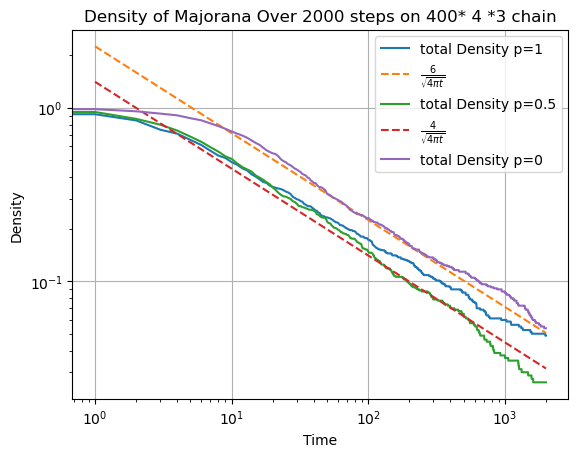

In [25]:
chain1_NL = chain_builder_NL(400, 4 , 4)
times1, density1 = evolution_annihilate_NL(chain1_NL, 2000, 1)
times2, density2 = evolution_annihilate_NL(chain1_NL, 2000, 0.5)
times3, density3 = evolution_annihilate_NL(chain1_NL, 2000, 0)
density_ref_1 = 2*4/(math.sqrt(4 * math.pi) * np.sqrt(times1[1:])) 
density_ref_2 = 5/(math.sqrt(4 * math.pi) * np.sqrt(times2[1:]))
# density_ref_3 = 6*1600/(math.sqrt(4 * math.pi) * np.sqrt(times3[1:]))

# plt.plot(times, density[:, 0], label='Layer 0')
# plt.plot(times, density[:, 1], label='Layer 1')
# plt.plot(times, density[:, 2], label='Layer 2')
plt.plot(times1, np.array(density1.sum(axis=1))/(400*4), label='total Density p=1')
plt.plot(times1[1:], density_ref_1, label=r'$\frac{6}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times2, np.array(density2.sum(axis=1))/(400*4), label='total Density p=0.5')
plt.plot(times2[1:], density_ref_2, label=r'$\frac{4}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times3, np.array(density3.sum(axis=1))/(400*4), label='total Density p=0')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.title('Density of Majorana Over 2000 steps on 400* 4 *3 chain')
plt.legend()
plt.show()



[500, 500, 500, 500, 500, 500]
[494, 498, 492, 492, 492, 492]
[470, 464, 470, 454, 454, 468]
[428, 410, 432, 410, 412, 426]
[400, 374, 402, 376, 368, 372]
[376, 336, 350, 324, 344, 340]
[342, 308, 324, 298, 314, 316]
[314, 286, 304, 278, 300, 294]
[292, 272, 282, 264, 282, 262]
[274, 264, 264, 244, 272, 250]
[254, 252, 258, 232, 264, 234]
[230, 246, 242, 230, 248, 226]
[222, 234, 236, 214, 232, 212]
[210, 230, 228, 206, 228, 206]
[202, 224, 218, 198, 222, 202]
[192, 218, 210, 190, 214, 200]
[190, 214, 208, 182, 206, 198]
[190, 206, 206, 176, 196, 190]
[182, 200, 200, 174, 192, 188]
[180, 192, 200, 174, 188, 180]
[178, 190, 196, 172, 180, 174]
[176, 188, 192, 162, 176, 174]
[172, 186, 188, 158, 174, 170]
[168, 182, 182, 154, 168, 168]
[166, 176, 174, 154, 166, 168]
[158, 170, 172, 152, 166, 162]
[156, 168, 172, 150, 166, 156]
[154, 160, 166, 148, 166, 148]
[154, 158, 164, 142, 164, 146]
[152, 154, 160, 142, 164, 144]
[150, 154, 160, 140, 160, 144]
[150, 148, 160, 138, 156, 144]
[150, 14

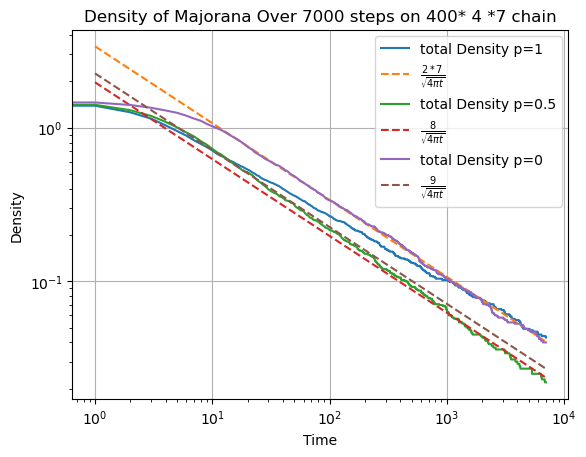

In [39]:
chain2_NL = chain_builder_NL(500, 4 , 6)
times4, density4 = evolution_annihilate_NL(chain2_NL, 7000, 1)
times5, density5 = evolution_annihilate_NL(chain2_NL, 7000, 0.5)
times6, density6 = evolution_annihilate_NL(chain2_NL, 7000, 0)
density_ref_3 = 2*6/(math.sqrt(4 * math.pi) * np.sqrt(times4[1:])) 
density_ref_4 = 7/(math.sqrt(4 * math.pi) * np.sqrt(times5[1:]))
density_ref_5 = 8/(math.sqrt(4 * math.pi) * np.sqrt(times5[1:]))
# density_ref_3 = 6*1600/(math.sqrt(4 * math.pi) * np.sqrt(times3[1:]))

# plt.plot(times, density[:, 0], label='Layer 0')
# plt.plot(times, density[:, 1], label='Layer 1')
# plt.plot(times, density[:, 2], label='Layer 2')
plt.plot(times4, np.array(density4.sum(axis=1))/(500*4), label='total Density p=1')
plt.plot(times4[1:], density_ref_3, label=r'$\frac{2*7}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times5, np.array(density5.sum(axis=1))/(500*4), label='total Density p=0.5')
plt.plot(times5[1:], density_ref_4, label=r'$\frac{8}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times6, np.array(density6.sum(axis=1))/(500*4), label='total Density p=0')
plt.plot(times5[1:], density_ref_5, label=r'$\frac{9}{\sqrt{4 \pi t}}$', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.title('Density of Majorana Over 7000 steps on 400* 4 *7 chain')
plt.legend()
plt.show()



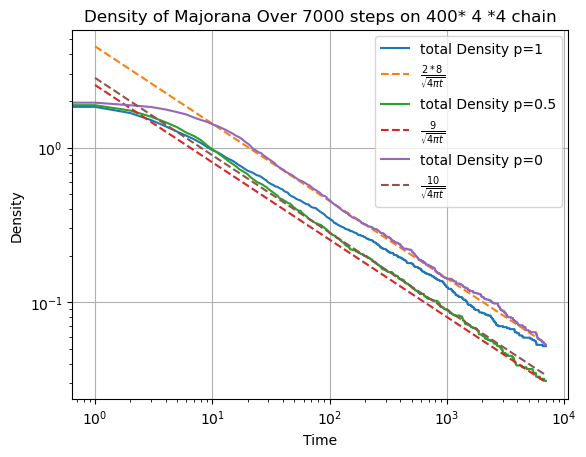

In [37]:
plt.plot(times4, np.array(density4.sum(axis=1))/(500*4), label='total Density p=1')
plt.plot(times4[1:], density_ref_3, label=r'$\frac{2*8}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times5, np.array(density5.sum(axis=1))/(500*4), label='total Density p=0.5')
plt.plot(times5[1:], density_ref_4, label=r'$\frac{9}{\sqrt{4 \pi t}}$', linestyle='--')
plt.plot(times6, np.array(density6.sum(axis=1))/(500*4), label='total Density p=0')
plt.plot(times5[1:], density_ref_5, label=r'$\frac{10}{\sqrt{4 \pi t}}$', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.title('Density of Majorana Over 7000 steps on 400* 4 *4 chain')
plt.legend()
plt.show()

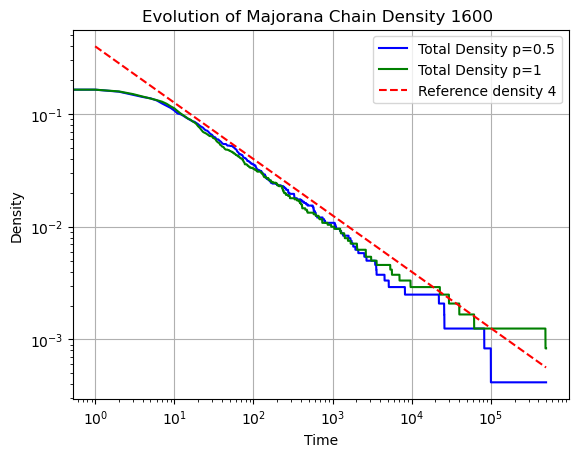

In [15]:
chain1_NL = chain_builder_NL(400, 4, 3)
times1_NL, density1_NL = evolution_annihilate_NL(chain1_NL, 5000, 1)
chain2_NL = chain_builder_NL(400, 4, 3)
times2_NL, density2_NL = evolution_annihilate_NL(chain2_NL, 5000, 0.25)
chain3_NL = chain_builder_NL(400, 4, 3)
times3_NL, density3_NL = evolution_annihilate_NL(chain3_NL, 5000, 0.75)
chain4_NL = chain_builder_NL(400, 4, 3)
times4_NL, density4_NL = evolution_annihilate_NL(chain4_NL, 5000, 0)

# Plotting the density evolution
density_ref_4 = 2/(math.sqrt(8 * math.pi) * np.sqrt(times1_NL[1:])) 

plt.plot(times1_NL, (density1_NL[:, 1]+ density1_NL[:, 0])/4800, label='Total Density p=1', color='blue')
plt.plot(times2_NL, (density2_NL[:, 1]+ density2_NL[:, 0])/4800, label='Total Density p=0.25', color='green')
plt.plot(times3_NL, (density3_NL[:, 1]+ density3_NL[:, 0])/4800, label='Total Density p=0.75', color='orange')
plt.plot(times4_NL, (density4_NL[:, 1]+ density4_NL[:, 0])/4800, label='Total Density p=0', color='purple')
plt.plot(times1_NL[1:], density_ref_4, label='Reference density 4', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Evolution of Majorana Chain Density {len(chain1_NL)} ')
# plt.xlim(0,6)
plt.legend()
plt.grid()
plt.show()

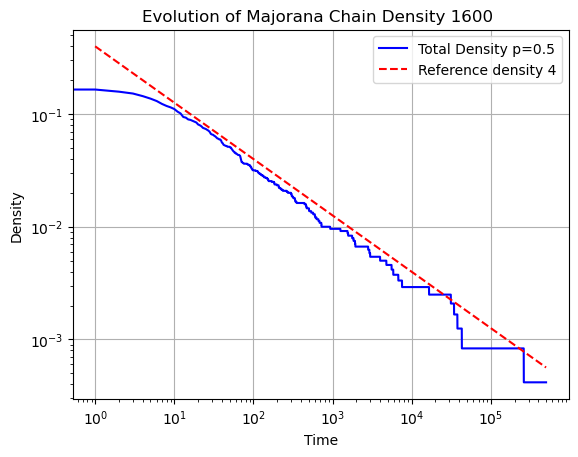

In [13]:
density_ref_4 = 2/(math.sqrt(8 * math.pi) * np.sqrt(times1[1:])) 
plt.plot(times1, (density1[:, 1]+ density1[:, 0])/4800, label='Total Density p=0.5', color='blue')
plt.plot(times1[1:], density_ref_4, label='Reference density 4', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xscale('log')
plt.yscale('log')
plt.title(f'Evolution of Majorana Chain Density {len(chain1)} ')
# plt.xlim(0,6)
plt.legend()
plt.grid()
plt.show()

In [ ]:
r = random.random()
for h in range(H):
    if h < chosen_layer:
        if r < p:
            if hop_direction0 >0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                            # get the index of paired Majorana
                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                partner_i = [x for x in pair_i if x != i][0]
                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                
                if partner_j == -10:
                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                # flip the fermionic parity
                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

            elif hop_direction0 <0 and chain[i][2][h] != -10:
                # get the index of paired Majorana
                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                partner_i = [x for x in pair_i if x != i][0]
                partner_j = [x for x in pair_j if x != i][0]

                # flip the fermionic parity
                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

    if h == chosen_layer:
        pass
    if h > chosen_layer:
        if r < p:
            if hop_direction0 <0 and chain[(i+hop_direction0) % N ][2][h] != -10: #if the site is empty
                            # get the index of paired Majorana
                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                pair_j = np.where(chain[:, 2, h] == chain[(i+hop_direction0) % N][2][h])[0]
                partner_i = [x for x in pair_i if x != i][0]
                partner_j = [x for x in pair_j if x != (i+hop_direction0)%N][0]
                
                if partner_j == -10:
                    raise ValueError("Partner Majorana is -10, check the chain structure.")
                # flip the fermionic parity
                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                chain[(i+hop_direction0) % N][0][h] = (chain[(i+hop_direction0) % N][0][h]+ 1) % 2
                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2

            elif hop_direction0 >0 and chain[i][2][h] != -10:
                # get the index of paired Majorana
                pair_i = np.where(chain[:, 2, chosen_layer] == chain[i][2][chosen_layer])[0]
                pair_j = np.where(chain[:, 2, h] == chain[i][2][h])[0]
                partner_i = [x for x in pair_i if x != i][0]
                partner_j = [x for x in pair_j if x != i][0]

                # flip the fermionic parity
                chain[i][0][chosen_layer] = (chain[i][0][chosen_layer] +1 ) % 2
                chain[partner_i][0][chosen_layer] = (chain[partner_i][0][chosen_layer] + 1) % 2
                chain[i][0][h] = (chain[i][0][h]+ 1) % 2
                chain[partner_j][0][h] = (chain[partner_j][0][h]+ 1) % 2